Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [18]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


 Question 2: Use Webscraping to Extract Tesla Revenue Data
 Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website with Tesla's revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send a GET request to fetch the webpage content
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url, headers=headers)

# Parse the webpage content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Locate the revenue table
revenue_table = soup.find("table", attrs={"class": "historical_data_table table"})  # First matching table

# Extract rows from the table body
rows = revenue_table.find("tbody").find_all("tr")  # Get all rows from the table body
data = []

# Loop through each row to extract year and revenue data
for row in rows:
    year = row.find_all("td")[0].text.strip()  # Extract the year
    revenue = row.find_all("td")[1].text.strip()  # Extract the revenue
    data.append([year, revenue])  # Append as a list of year and revenue

# Create a DataFrame from the extracted data
tesla_revenue = pd.DataFrame(data, columns=["Year", "Revenue"])

# Clean the revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")  # Remove $, commas
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")  # Convert to numeric

# Drop rows with missing revenue values (if any)
tesla_revenue.dropna(inplace=True)

# Display the last five rows of the DataFrame
tesla_revenue.tail()

,Year,Revenue
11,2013,2013
12,2012,413
13,2011,204
14,2010,117
15,2009,112


Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [3]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [6]:
# URL of the website with GameStop's revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send a GET request to fetch the webpage content
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url, headers=headers)

# Parse the webpage content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Locate the revenue table
revenue_table = soup.find("table", attrs={"class": "historical_data_table table"})  # First matching table

# Extract rows from the table body
rows = revenue_table.find("tbody").find_all("tr")  # Get all rows from the table body
data = []

# Loop through each row to extract year and revenue data
for row in rows:
    year = row.find_all("td")[0].text.strip()  # Extract the year
    revenue = row.find_all("td")[1].text.strip()  # Extract the revenue
    data.append([year, revenue])  # Append as a list of year and revenue

# Create a DataFrame from the extracted data
gme_revenue = pd.DataFrame(data, columns=["Year", "Revenue"])

# Clean the revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")  # Remove $, commas
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")  # Convert to numeric

# Drop rows with missing revenue values (if any)
gme_revenue.dropna(inplace=True)

# Display the last five rows of the DataFrame
gme_revenue.tail()

,Year,Revenue
11,2013,8887
12,2012,9551
13,2011,9474
14,2010,9078
15,2009,8806


In [14]:
def make_graph(data, title):
    """
    Plots the stock's closing price over time.

    Parameters:
    - data: DataFrame containing stock data with a 'Date' and 'Close' column.
    - title: Title for the graph.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', linewidth=2)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price (USD)', fontsize=12)
    plt.title(title, fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()


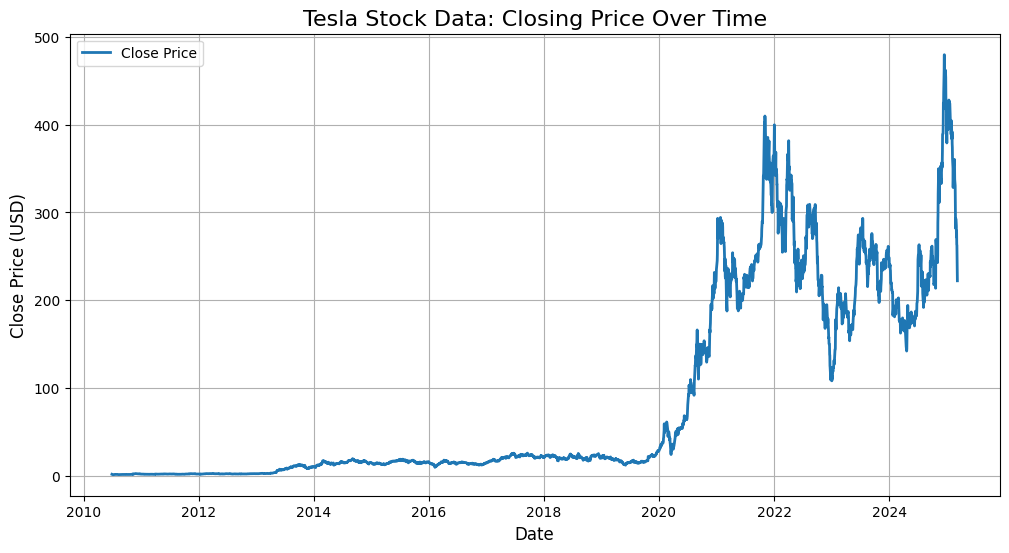

In [15]:
make_graph(tesla_data, "Tesla Stock Data: Closing Price Over Time")

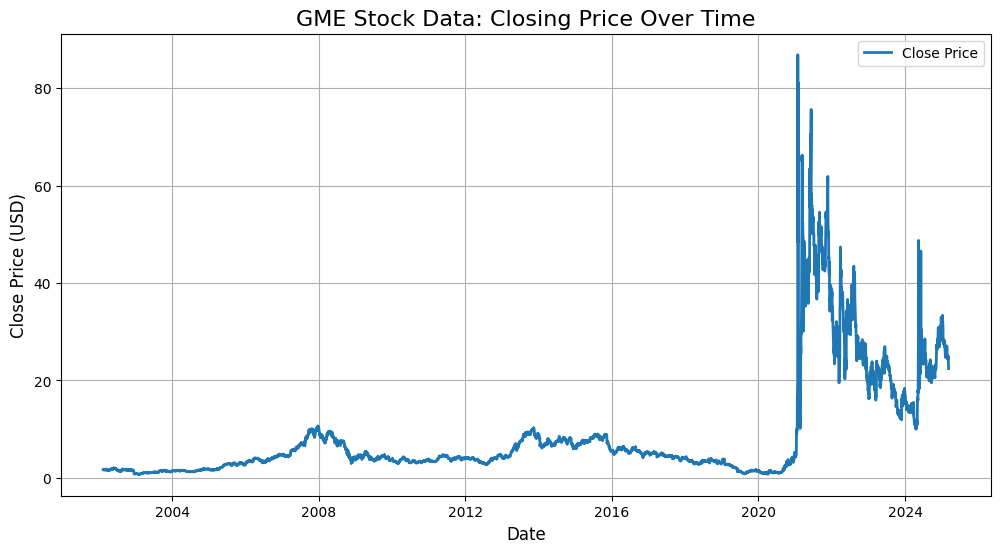

In [17]:
make_graph(gme_data, "GME Stock Data: Closing Price Over Time")